# The Lazy Gardener: Selecting an Optimal Watering Strategy through Reinforcement Learning
### MSCA 32020 Reinforcement Learning
#### Spring 2021
#### Team Members:
 - Nina Randorf
 - Remy Zhong
 - Arpit Parihar
#
 ****
### Model 4 - DQN - Single Network
 ****

### Importing modules

In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from DQN import DQNAgent_1NN, DQNAgent_2NN
from TLG_env import garden_env


### Declare environment constants and transition matrices

In [2]:
# Dictionaries to keep track of weather, bunny and actions
WEATHER = {0: "Sunny", 1: "Rainy", 2: "Stormy"}
BUNNY = {0: "No_Bunny", 1: "Bunny"}
ACTIONS = {-1: "Pump", 0: "Rest", 1: "Water"}

# List of possible saturation states
STATES = list(range(-1, 6))

# Weather to weather transition matrix
P_WEATHER = pd.DataFrame({0: [0.75, 0.3, 0.4], 1: [0.2, 0.5, 0.4], 2: [0.05, 0.2, 0.2]})

# Weather to bunny transition matrix
P_BUNNY = pd.DataFrame({0: [0.2, 0.8], 1: [0.6, 0.4], 2: [0.9, 0.1]})


### Running DQN algorithm with a single neural network

In [3]:
EPISODES = 500
DAYS_TILL_HARVEST = 50
HARVEST_REWARD = 50
batch_size = 32

env = garden_env(WEATHER, BUNNY, ACTIONS, STATES, P_WEATHER, P_BUNNY)
state_size = len(eval(env.state))
action_size = len(env.A)
agent = DQNAgent_1NN(state_size, action_size)
try:
    agent.load("Files/DQN_1NN_500.h5")
    print("Model weights loaded from disk")
except:
    for e in range(EPISODES):
        env.reset_env()
        state = np.array(eval(env.state))
        state = np.reshape(state, [1, state_size])
        for day in range(DAYS_TILL_HARVEST):
            action = agent.act(state)
            env.step(action)
            next_state = np.array(eval(env.state))
            reward = (
                env.reward
                if day < DAYS_TILL_HARVEST - 1
                else env.reward + HARVEST_REWARD
            )
            next_state = np.reshape(next_state, [1, state_size])
            agent.memorize(state, action, reward, next_state, day)
            state = next_state
            if len(agent.memory) > batch_size:
                agent.replay(batch_size)
            if next_state[0][0] in [min(env.S), max(env.S)]:
                break
        print(f"Episode {e + 1} finished")
        if day == (DAYS_TILL_HARVEST - 1):
            print(f"Tomatoes harvested on episode {e + 1}")

    agent.save("Files/DQN_1NN_500.h5")
    print("Model weights saved to disk")

Model weights loaded from disk


### Displaying final Q-values and policy

In [4]:
Q_table_DQN_1NN = pd.DataFrame(
    agent.model.predict(np.array([eval(x) for x in env.P_ind])),
    columns=(env.A.values()),
    index=env.P_ind,
)
Q_values_1NN = pd.Series(
    agent.model.predict(np.array([eval(x) for x in env.P_ind])).max(axis=1),
    index=env.P_ind,
)
policy_1NN = pd.Series(
    [
        np.argmax(agent.model.predict(np.reshape(np.array(eval(x)), [1, state_size])))
        for x in env.P_ind
    ],
    index=env.P_ind,
)
Q_table_DQN_1NN["Policy_DQN_1NN"] = pd.Series(
    [env.A[x - 1] for x in policy_1NN], index=env.P_ind
)
Q_table_DQN_1NN.loc[[eval(x)[0] not in [min(env.S), max(env.S)] for x in env.P_ind], :]

,Pump,Rest,Water,Policy_DQN_1NN
"(0, 0, 0)",-263.501678,-236.258530,-198.361252,Water
"(1, 0, 0)",-221.975769,-199.489029,-204.098770,Rest
"(2, 0, 0)",-225.606049,-203.262833,-233.302719,Rest
"(3, 0, 0)",-271.033142,-244.306320,-284.173248,Rest
"(4, 0, 0)",-316.460236,-285.349823,-335.043762,Rest
"(0, 1, 0)",-268.502716,-240.520187,-203.486588,Water
"(1, 1, 0)",-226.976807,-203.750671,-209.224106,Rest
"(2, 1, 0)",-229.986908,-206.995346,-238.111588,Rest
"(3, 1, 0)",-275.413971,-248.038803,-288.982086,Rest
"(4, 1, 0)",-320.841064,-289.082306,-339.852600,Rest


### Policy evaluation

In [5]:
env = garden_env(WEATHER, BUNNY, ACTIONS, STATES, P_WEATHER, P_BUNNY, no_term=True)
episode_tracker = pd.DataFrame(columns=["Pump", "Rest", "Water", "Reward", "Died"])

try:
    episode_tracker = joblib.load("Files/DQN1_sim_episode_tracker.pkl")
    print("Episode tracker loaded from disk")
except:
    for episode in range(1000):
        env.reset_env()
        state = env.state
        episode_stats = {"Pump": 0, "Rest": 0, "Water": 0, "Reward": 0, "Died": 0}
        for day in range(DAYS_TILL_HARVEST):
            env.step(policy_1NN.loc[state])
            future_state = env.state
            episode_stats["Reward"] += (
                env.reward
                if day < DAYS_TILL_HARVEST - 1
                else env.reward + HARVEST_REWARD
            )
            episode_stats[env.A[policy_1NN.loc[state] - 1]] += 1
            state = future_state
            if eval(future_state)[0] in [min(env.S), max(env.S)]:
                episode_stats["Died"] += 1
                break
        episode_tracker = episode_tracker.append(episode_stats, ignore_index=True)
    _ = joblib.dump(episode_tracker, "Files/DQN1_sim_episode_tracker.pkl")
    print("Episode tracker saved to disk")
episode_tracker.mean()

Episode tracker loaded from disk


Pump       0.000
Rest      20.490
Water     17.819
Reward   -30.791
Died       0.381
dtype: float64

### Visualizations - Value and Policy

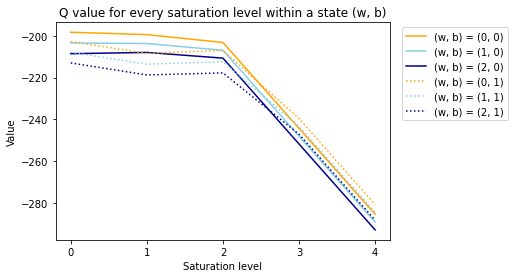

In [6]:
plot_df = pd.DataFrame(
    columns=env.P_bw.index, index=set(env.S) - set([min(env.S), max(env.S)])
)
for i in [(x,) + eval(y) for x in plot_df.index for y in plot_df.columns]:
    plot_df.loc[i[0], f"{i[1:]}"] = Q_values_1NN.loc[f"{i}"]

col = ["orange", "skyblue", "darkblue"] * 2
linestyle = ["-"] * 3 + ["dotted"] * 3
_ = plt.figure()
for (i, j) in enumerate(plot_df.columns):
    _ = plt.plot(
        plot_df[j], color=col[i], linestyle=linestyle[i], label="(w, b) = " + j
    )

_ = plt.ylabel("Value")
_ = plt.xlabel("Saturation level")
_ = plt.title("Q value for every saturation level within a state (w, b)")
_ = plt.xticks(plot_df.index)
_ = plt.legend(bbox_to_anchor=(1.02, 1))
_ = plt.show()

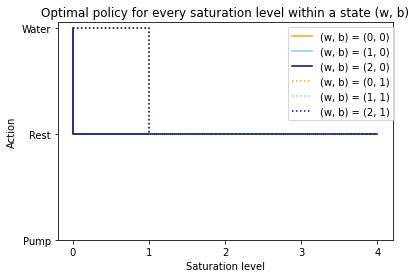

In [7]:
plot_df = pd.DataFrame(
    columns=env.P_bw.index, index=set(env.S) - set([min(env.S), max(env.S)])
)
for i in [(x,) + eval(y) for x in plot_df.index for y in plot_df.columns]:
    plot_df.loc[i[0], f"{i[1:]}"] = policy_1NN.loc[f"{i}"]

col = ["orange", "skyblue", "darkblue"] * 2
linestyle = ["-"] * 3 + ["dotted"] * 3
_ = plt.figure()
for (i, j) in enumerate(plot_df.columns):
    _ = plt.plot(
        plot_df[j],
        color=col[i],
        linestyle=(linestyle[i]),
        label="(w, b) = " + j,
        drawstyle="steps",
    )

_ = plt.ylabel("Action")
_ = plt.xlabel("Saturation level")
_ = plt.title("Optimal policy for every saturation level within a state (w, b)")
_ = plt.xticks(plot_df.index)
_ = plt.yticks([0] + sorted(policy_1NN.unique()), env.A.values())
_ = plt.legend(bbox_to_anchor=(1.02, 1))
_ = plt.show()
